In [121]:
import cv2
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm

from base_functions import format_frames

import warnings
warnings.filterwarnings('ignore')


In [66]:
df= pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\101322\J20LT\oa\raw_J20LT_101322_oa.h5')


In [77]:
test = df.sample(1)

In [86]:
test.odd

58    True
Name: odd, dtype: object

In [119]:
mid.dtype

dtype('float64')

In [ ]:
test = df.sample(30)
test = test.reset_index()
plt.subplots(6,5, figsize=(25,21)) 
for ind, row in test.iterrows():
    mid = np.ceil(len(row['obstacleTL_x_cm'])/2)
    mid = np.int(mid)
    
    plt.subplot(6,5,ind +1)
    plt.scatter([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']],color='red')

    plt.scatter([row['obstacleTL_x_cm_lind'], row['obstacleTR_x_cm_lind'], row['obstacleBL_x_cm_lind'], row['obstacleBR_x_cm_lind']],
                [row['obstacleTL_y_cm_lind'], row['obstacleTR_y_cm_lind'], row['obstacleBL_y_cm_lind'], row['obstacleBR_y_cm_lind']],color='blue')
    
    plt.scatter([row['obstacleTL_x_cm'][mid:], row['obstacleTR_x_cm'][mid:], row['obstacleBL_x_cm'][mid:], row['obstacleBR_x_cm'][mid:]],
                [row['obstacleTL_y_cm'][mid:], row['obstacleTR_y_cm'][mid:], row['obstacleBL_y_cm'][mid:], row['obstacleBR_y_cm'][mid:]],color='green')

    plt.scatter([row['obstacleTL_x_cm'][:mid], row['obstacleTR_x_cm'][:mid], row['obstacleBL_x_cm'][:mid], row['obstacleBR_x_cm'][:mid]],
                [row['obstacleTL_y_cm'][:mid], row['obstacleTR_y_cm'][:mid], row['obstacleBL_y_cm'][:mid], row['obstacleBR_y_cm'][:mid]],color='yellow')


    
    
    plt.scatter(row['obstacle_x_cm_lind'],row['obstacle_y_cm_lind'],color='yellow')

   
    sns.scatterplot(x=row['nose_x_cm'],y=row['nose_y_cm'],hue = row['nose_x_cm'], palette ='magma') 

In [125]:
obstacle_cols = [col for col in df.columns if 'obstacle' in col]
obstacle_cols = [col for col in obstacle_cols if 'likelihood' not in col]
obstacle_cols = [col for col in obstacle_cols if 'std' not in col]
obstacle_cols = [col for col in obstacle_cols if 'lind' not in col]

obstacle_cols

['obstacleTL_x',
 'obstacleTL_y',
 'obstacleTR_x',
 'obstacleTR_y',
 'obstacleBR_x',
 'obstacleBR_y',
 'obstacleBL_x',
 'obstacleBL_y',
 'obstacleTL_x_cm',
 'obstacleTL_y_cm',
 'obstacleTR_x_cm',
 'obstacleTR_y_cm',
 'obstacleBR_x_cm',
 'obstacleBR_y_cm',
 'obstacleBL_x_cm',
 'obstacleBL_y_cm']

In [123]:
## get median center and median poit at first and last half of trial

for ind, row in df.iterrows():
    # find mid point of obstacle poistion trace
    mid = np.ceil(len(row['obstacleTL_x_cm'])/2)
    mid = np.int(mid)
    
    # calculate median of each corner
    obstacle_cols = [col for col in df.columns if 'obstacle' in col]
    obstacle_cols = [col for col in obstacle_cols if 'likelihood' not in col]
    obstacle_cols = [col for col in obstacle_cols if 'std' not in col]
    obstacle_cols = [col for col in obstacle_cols if 'lind' not in col]
    for col in obstacle_cols:
        df.at[ind,col+'_fh']= row
        

    


    xvals = np.stack([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']])
    obstacle_cen_x = np.nanmedian(xvals)

    yvals = np.stack([row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']])
    obstacle_cen_y = np.nanmedian(yvals)

     xvals = np.stack([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']])
    obstacle_cen_x = np.nanmedian(xvals)

    yvals = np.stack([row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']])
    obstacle_cen_y = np.nanmedian(yvals)
    
    

SyntaxError: unexpected EOF while parsing (634326706.py, line 3)

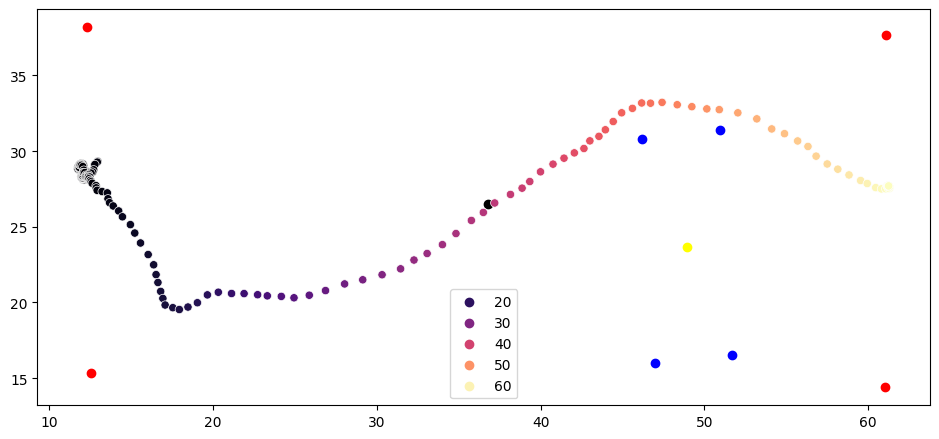

In [114]:
plt.figure(figsize=(9.5,4.5))
for ind, row in test.iterrows():
    plt.scatter([row['arenaTL_x_cm'] , row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']],color='red')

    plt.scatter([row['obstacleTL_x_cm_lind'], row['obstacleTR_x_cm_lind'], row['obstacleBL_x_cm_lind'], row['obstacleBR_x_cm_lind']],
                [row['obstacleTL_y_cm_lind'], row['obstacleTR_y_cm_lind'], row['obstacleBL_y_cm_lind'], row['obstacleBR_y_cm_lind']],color='blue')
    
    
    plt.scatter(row['obstacle_x_cm_lind'],row['obstacle_y_cm_lind'],color='yellow')

    plt.scatter(arena_cen_x,arena_cen_y, color ='black')

   
    sns.scatterplot(x=row['nose_x_cm'],y=row['nose_y_cm'],hue = row['nose_x_cm'], palette ='magma')

    plt.tight_layout()            
                

In [88]:
print([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']])

[12.509119708629605, 61.018999683123866, 12.27296251692022, 61.10483984322329] [15.314053243987686, 14.403149496677877, 38.18786689104587, 37.69289144344776]


In [113]:
## get center of arena
xvals = np.stack([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']])
arena_cen_x = np.nanmedian(xvals)

yvals = np.stack([row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']])
arena_cen_y = np.nanmedian(yvals)

In [ ]:
row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']

In [15]:
def format_frames(vid_path,dwnsmpl):
    # open the .avi file
    vidread = cv2.VideoCapture(vid_path)
    # empty array that is the target shape
    # should be number of frames x downsampled height x downsampled width
    #all_frames = np.empty([int(vidread.get(cv2.CAP_PROP_FRAME_COUNT)),
                           #int(vidread.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                           #int(vidread.get(cv2.CAP_PROP_FRAME_WIDTH))], dtype=np.uint8)
     
    all_frames = np.empty([int(vidread.get(cv2.CAP_PROP_FRAME_COUNT)),
                            int(vidread.get(cv2.CAP_PROP_FRAME_HEIGHT)*dwnsmpl),
                            int(vidread.get(cv2.CAP_PROP_FRAME_WIDTH)*dwnsmpl)], dtype=np.uint8)
    # iterate through each frame
    for frame_num in tqdm(range(0,int(vidread.get(cv2.CAP_PROP_FRAME_COUNT)))):
        # read the frame in and make sure it is read in correctly
        ret, frame = vidread.read()
        if not ret:
            break
        # convert to grayyscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # downsample the frame by an amount specified in the config file
        sframe = cv2.resize(frame, (0,0), fx=dwnsmpl, fy=dwnsmpl, interpolation=cv2.INTER_NEAREST) 

        # add the downsampled frame to all_frames as int8
        all_frames[frame_num,:,:] = sframe.astype(np.uint8)
    #if not usexr:
        #return all_frames    
          
        # store the combined video frames in an xarray

    formatted_frames = xr.DataArray(all_frames.astype(np.uint8), dims=['frame', 'height', 'width'])
        # label frame numbers in the xarray
    formatted_frames.assign_coords({'frame':range(0,len(formatted_frames))})
        # delete all frames, since it's somewhat large in memory
    del all_frames
    return formatted_frames

In [45]:
def plot_traces():

SyntaxError: invalid syntax (803721154.py, line 1)

In [ ]:
def check_likellihood():

In [18]:
vid = format_frames(r'C:/Users/nlab/obstacle_avoidance/recordings\101422\J20RT\oa\101422_J20RT_control_Rig2_oa_top1.avi',.75)

100%|██████████| 31413/31413 [00:36<00:00, 852.84it/s]


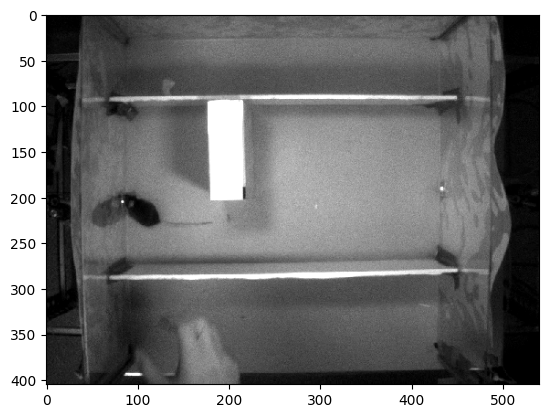

In [33]:
frame = vid[1000,:,:]
plt.imshow(frame, cmap='gray')

In [34]:
vid_save= vid.astype('int64')

MemoryError: Unable to allocate 51.2 GiB for an array with shape (31413, 405, 540) and data type int64

In [32]:
vid_save.to_netcdf(r'C:/Users/nlab/obstacle_avoidance/recordings\101422\J20RT\oa\frames.nc',mode='w', engine = 'netcdf4')

ImportError: DLL load failed while importing _netCDF4: The specified procedure could not be found.

In [27]:
vid.to_netcdf(r'C:/Users/nlab/obstacle_avoidance/recordings\101422\J20RT\oa\fames.nc', mode='w')

ValueError: could not safely cast array from dtype uint8 to int8

In [10]:
frames = vid[0:1000,:,:]

In [23]:
frames.shape

(1000, 540, 720)

In [27]:

np.array(df.at[1,'trial_vidframes'])

array([[1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
        1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
        1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
        1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
        1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
        2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
        2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
        2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057,
        2058, 2059, 2060, 2061, 2062, 

In [33]:
df.at[1,'trial_vidframes'].astype(int)[:,-1]

array([2157])

In [34]:
df.at[1,'trial_vidframes'].astype(int)[:,0]

array([1915])

In [52]:

for ind,row in df.iterrows():
    first_frame = row['trial_vidframes'][0]
    last_frame = row['trial_vidframes'][-1]
    df.at[ind,'trial_frames_array'] = vid[first_frame[0]:last_frame[-1],:,:].astype(object)

AttributeError: 'DataArray' object has no attribute 'take'

In [45]:
vid[first_frame[0]:last_frame[-1],:,:].astype(object).shape


(242, 540, 720)

In [33]:
row['trial_vidframes'][0]

2158

In [9]:
vid[first_frame:last_frame,:,:]

TypeError: only integer scalar arrays can be converted to a scalar index

In [14]:
first_frame[0]

1915

In [47]:
vid[first_frame[0]:last_frame[-1],:,:].shape

(242, 540, 720)

In [46]:
vid[first_frame[0]:last_frame[-1],:,:].astype(object)

array([[[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [15, 10, 12, ..., 0, 0, 0],
        [13, 11, 12, ..., 0, 0, 0],
        [13, 12, 12, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 3, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [13, 12, 10, ..., 0, 0, 0],
        [12, 11, 10, ..., 0, 0, 0],
        [11, 11, 11, ..., 0, 0, 0]],

       [[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [11, 9, 5, ..., 0, 0, 0],
        [11, 9, 6, ..., 0, 0, 0],
        [15, 12, 11, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        ...,
        [19, 18, 22, ..., 0, 0, 0],
        [15, 17, 17, ..., 0, 0, 0],
        [11, 16, 12, ..., 0, 0, 0]],

       [[2, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 0, 0, 0],
    